## 공공데이터 포털 ( https://www.data.go.kr/dataset/15043025/openapi.do )
## 데이터 : 건강보험심사평가원_공적 마스크 판매 정보 api 사용
코로나 19에 대해 WHO는 "팬데믹"이라 선언하였다. 갑자기 늘어난 마스크 수요에 마스크 대란이 이어지면서 대응하기 위해 정부는 약국은 '마스크 5부제'를 3월 9일부터 시행하고 약국이외에, 농협, 우체국에 마스크 유통에 힘쓰고 있다. 
이번 분석은 전국에 마스크를 구매할 수 있는 유통지에 대한 파악을 위해 **건강보험심사 평가원의 공적 마스크 판매 정보** 데이터를 이용하였다.  

## DATA SET 만들기

In [1]:
#그래프를 그리기 위해 라이브러리 불러오기
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.__version__

'3.1.1'

In [3]:
# pandas 모듈 사용

import pandas as pd

# pandas 버전 확인

pd.__version__

'0.25.1'

open API 활용 참조 (https://hongsamm.tistory.com/21)

In [4]:
#import urllib2
import urllib
import json
from urllib.request import urlopen

html_page = urlopen("https://8oi9s0nnth.apigw.ntruss.com/corona19-masks/v1/stores/json?page=1")

- key 항목명(국문) type
- count 조회 수 (integer)
- page 페이지 번호 (integer)
- storeInfos: 판매처 정보 리스트 (List)

- addr: 주소(string)
- code: 식별코드(integer)
- lat: 위도 number($float)

- lng: 경도 number($float)
- name: 이름(string)
- type: 판매처 유형(string) 약국: '01', 우체국: '02', 농협: '03'


In [5]:
#데이터를 json형태로 가져온다
mask_data = json.loads(html_page.read())
mask_data

{'count': 486,
 'page': '1',
 'storeInfos': [{'addr': '충청남도 홍성군 갈산면 상촌로 12-1',
   'code': '34840559',
   'lat': 36.6029863,
   'lng': 126.5489114,
   'name': '신신약국',
   'type': '01'},
  {'addr': '대구광역시 달서구 달구벌대로 1736 1층 (두류동)',
   'code': '37844571',
   'lat': 35.856678,
   'lng': 128.5552778,
   'name': '밝은온누리약국',
   'type': '01'},
  {'addr': '충청남도 보령시 남대천로 58 (대천동)',
   'code': '34833323',
   'lat': 36.3487417,
   'lng': 126.5935343,
   'name': '지애약국',
   'type': '01'},
  {'addr': '경상북도 고령군 쌍림면 대가야로 608',
   'code': 5038300744,
   'lat': 35.6791963,
   'lng': 128.2422529,
   'name': '고령쌍림우체국',
   'type': '02'},
  {'addr': '부산광역시 금정구 서동로 168 송월빌딩 1층 102호 (서동)',
   'code': '21839824',
   'lat': 35.2144484,
   'lng': 129.1047754,
   'name': '굿모닝약국',
   'type': '01'},
  {'addr': '경상남도 함양군 함양읍 한들로 143',
   'code': '38827077',
   'lat': 35.5197038,
   'lng': 127.7321179,
   'name': '평화약국',
   'type': '01'},
  {'addr': '충청남도 태안군 태안읍 중앙로 33 (한국통신)',
   'code': '34831185',
   'lat': 36.755742

In [6]:
#파싱해온 데이터를 dataframe으로 만든다
mask = pd.DataFrame()
mask = mask.append({ 'addr':'', 'code':'', 'lat':'', 'lng':'', 'name':'', 
                    'type':''},
ignore_index = True)

In [7]:
mask

,addr,code,lat,lng,name,type
0,,,,,,


In [8]:
mask_data['storeInfos'][1]

{'addr': '대구광역시 달서구 달구벌대로 1736 1층 (두류동)',
 'code': '37844571',
 'lat': 35.856678,
 'lng': 128.5552778,
 'name': '밝은온누리약국',
 'type': '01'}

In [9]:
mask_data['storeInfos'][1]['addr']

'대구광역시 달서구 달구벌대로 1736 1층 (두류동)'

In [10]:
num=len(mask_data['storeInfos'])
for i in range(0,num):
    mask.ix[i, 'addr'] = mask_data['storeInfos'][i]['addr']
    mask.ix[i, 'code'] = mask_data['storeInfos'][i]['code']
    mask.ix[i, 'lat'] = mask_data['storeInfos'][i]['lat']
    mask.ix[i, 'lng'] = mask_data['storeInfos'][i]['lng']
    mask.ix[i, 'name'] = mask_data['storeInfos'][i]['name']
    mask.ix[i, 'type'] = mask_data['storeInfos'][i]['type']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

In [11]:
#데이터의 총 길이를 구한다
len(mask_data['storeInfos'])

486

In [12]:
#데이터의 길이가 488row로 일치한다. 데이터를 확인해보니 address, code, lat,lng, name, type을 제대로 들어갔음을 확인한다.
mask

,addr,code,lat,lng,name,type
0,충청남도 홍성군 갈산면 상촌로 12-1,34840559,36.603,126.549,신신약국,01
1,대구광역시 달서구 달구벌대로 1736 1층 (두류동),37844571,35.8567,128.555,밝은온누리약국,01
2,충청남도 보령시 남대천로 58 (대천동),34833323,36.3487,126.594,지애약국,01
3,경상북도 고령군 쌍림면 대가야로 608,5038300744,35.6792,128.242,고령쌍림우체국,02
4,부산광역시 금정구 서동로 168 송월빌딩 1층 102호 (서동),21839824,35.2144,129.105,굿모닝약국,01
...,...,...,...,...,...,...
481,부산광역시 남구 수영로 21 1층 (문현동),21839018,35.1373,129.07,다솜약국,01
482,서울특별시 영등포구 영등포로86길 14-1 (신길동),12834289,37.5118,126.923,새서울약국,01
483,부산광역시 동래구 여고북로 169 (온천동),21830118,35.2022,129.074,선약국,01
484,인천광역시 연수구 비류대로 429 (연수동),31832318,37.4244,126.683,최현수약국,01


데이터의 준비는 이제 끝났다.

## 마스크 판매처 유형 분석
type: 판매처 유형(string) 약국: '01', 우체국: '02', 농협: '03'

In [13]:
import platform
import matplotlib
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)

%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [14]:
#마스크 구입가능 유형확인 
mask['type'].unique()

array(['01', '02', '03'], dtype=object)

Text(0.5, 1.0, '마스크 구입가능 판매처 유형 ')

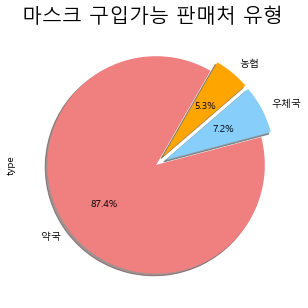

In [15]:
#pie plot 시각화 하기
labels=['약국', '우체국', '농협']
mask['type'].value_counts().plot.pie(labels = labels
                    ,colors= ['lightcoral', 'lightskyblue', 'orange']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1, 0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 10)
plt.title('마스크 구입가능 판매처 유형 ', fontsize=20)

### 마스크 판매처 유형
민간 유통 경로를 제외한 마스크 구입처를 확인하니 농협은 전체의 5.3%, 우체국은 전체의 7.6%, 약국은 전체의 87.1%를 차지함을 확인 할 수 있다.  

## 마스크 판매처 지열별 비교
## histogram으로 시각화

In [16]:
#마스크 판매처가 지역별로 어떻게 분포되어 있는지 확인하기 위해 `addr`에서 지역만 따로 뽑아 `지역` column에 만들어 넣음
mask['지역']=''
## 지역별 개수 세기
for i in range(len(mask)):
    mask['지역'][i]=mask['addr'][i].split(' ')[0]
mask

,addr,code,lat,lng,name,type,지역
0,충청남도 홍성군 갈산면 상촌로 12-1,34840559,36.603,126.549,신신약국,01,충청남도
1,대구광역시 달서구 달구벌대로 1736 1층 (두류동),37844571,35.8567,128.555,밝은온누리약국,01,대구광역시
2,충청남도 보령시 남대천로 58 (대천동),34833323,36.3487,126.594,지애약국,01,충청남도
3,경상북도 고령군 쌍림면 대가야로 608,5038300744,35.6792,128.242,고령쌍림우체국,02,경상북도
4,부산광역시 금정구 서동로 168 송월빌딩 1층 102호 (서동),21839824,35.2144,129.105,굿모닝약국,01,부산광역시
...,...,...,...,...,...,...,...
481,부산광역시 남구 수영로 21 1층 (문현동),21839018,35.1373,129.07,다솜약국,01,부산광역시
482,서울특별시 영등포구 영등포로86길 14-1 (신길동),12834289,37.5118,126.923,새서울약국,01,서울특별시
483,부산광역시 동래구 여고북로 169 (온천동),21830118,35.2022,129.074,선약국,01,부산광역시
484,인천광역시 연수구 비류대로 429 (연수동),31832318,37.4244,126.683,최현수약국,01,인천광역시


In [17]:
#중복이 되는 지역이 있는지 확인하기 위해 unique를 찍어본다
mask['지역'].unique()

array(['충청남도', '대구광역시', '경상북도', '부산광역시', '경상남도', '서울특별시', '강원도', '전라북도',
       '대전광역시', '충청북도', '인천광역시', '경기도', '울산광역시', '전라남도', '제주특별자치도',
       '광주광역시', '통영시', '횡성군', '세종특별자치시', '원주시', '파주시', '진주시'],
      dtype=object)

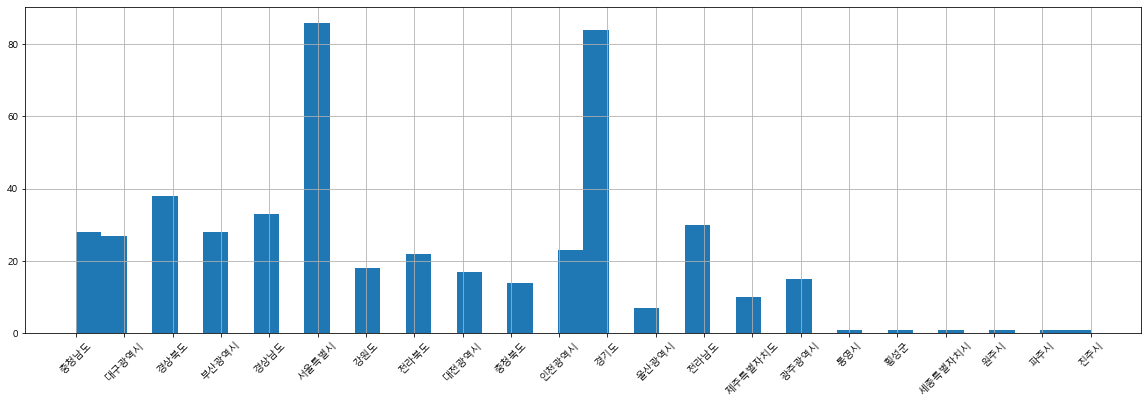

In [18]:
plt.xticks(rotation=45) #한글 겹침 문제 해결: 45도 기울기 설정
mask['지역'].hist(figsize=(20,6), bins=40)

`histogram`을 이용해 마스크 판매처가 지역별 분포를 확인해보니 top3는 *서울특별시>경기도>경상북도*이다

In [19]:
len(mask['지역'].unique())

22

In [20]:
mask['지역'].unique()

array(['충청남도', '대구광역시', '경상북도', '부산광역시', '경상남도', '서울특별시', '강원도', '전라북도',
       '대전광역시', '충청북도', '인천광역시', '경기도', '울산광역시', '전라남도', '제주특별자치도',
       '광주광역시', '통영시', '횡성군', '세종특별자치시', '원주시', '파주시', '진주시'],
      dtype=object)

## 지역별 마스크 구입 장소 지도에 시각화 

In [21]:
#mask에서 위도 경도만 뽑아 coordinates dataframe을 만들어 담는다.
coordinates = mask[['lat','lng']]
coordinates

,lat,lng
0,36.603,126.549
1,35.8567,128.555
2,36.3487,126.594
3,35.6792,128.242
4,35.2144,129.105
...,...,...
481,35.1373,129.07
482,37.5118,126.923
483,35.2022,129.074
484,37.4244,126.683


In [22]:
#지도 시각화 library folium 설치하기 
#conda install -c conda-forge folium

In [23]:
# 지도 준비
import folium 

map = folium.Map(location=[37.82, 128.15], zoom_start=10)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=3_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

### 지도 시각화 결과
각 유통 판매처를 원으로 지도 위에 뿌려보니, **서울,경기,대구,부산**에 원이 겹쳐 많은 분포를 확인 할 수 있고 나머지 지역은 상대적으로 너무나 부족해 보인다.

In [24]:
# 스타일을 바꿔서 그래프 시각화 시도
for lat, lng in coordinates.values:   
    marker = folium.Marker(
        location=[lat, lng],
        popup='The Waterfont'
    )
    marker.add_to(map)

map

`folium.Marker` 스타일로 유통 판매처를 다시한번 지도에 뿌려보니 위의 지도보다 현황을 파악하기 어려웠다. 실용적이지 않은 데이터 시각화이다.  